In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

### Reading the data 

In [2]:
df = pd.read_csv("/kaggle/input/loan-status-prediction/loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(381, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

### Exploratory Data Analysis and Visualization

* Removing unnecessery columns from dataset 

In [8]:
df.drop("Loan_ID",axis=1,inplace=True)

In [9]:
df.shape

(381, 12)

* Gender 

In [10]:
df["Gender"].value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

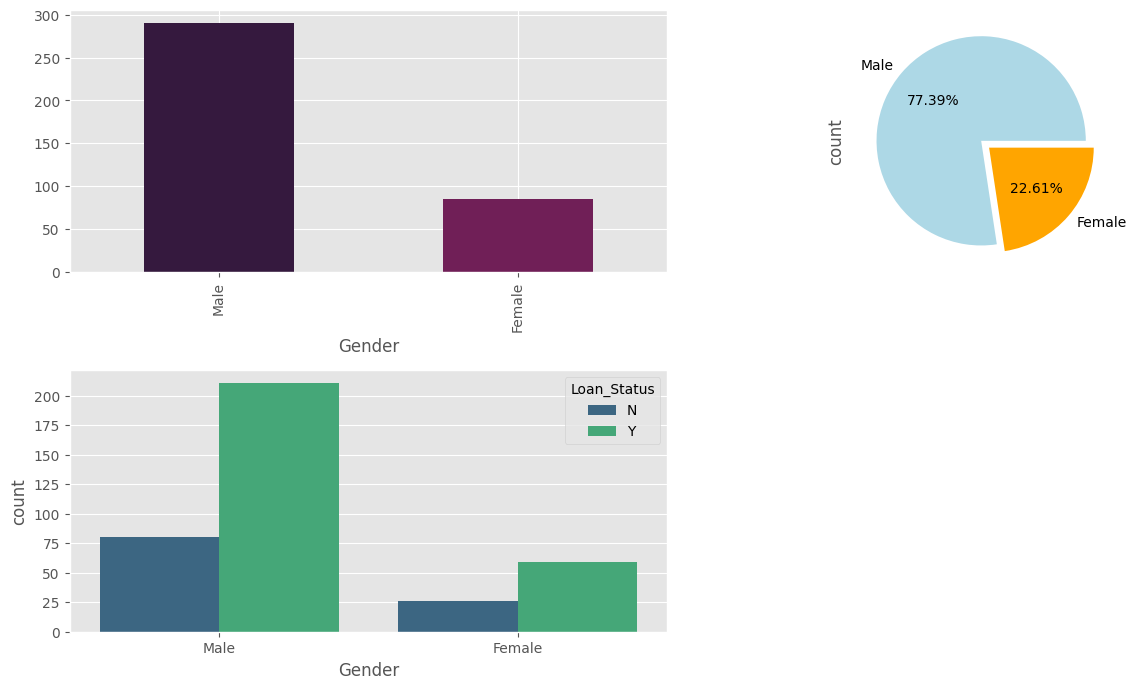

In [11]:
plt.figure(figsize=(13,7))
plt.subplot(2,2,1)
df["Gender"].value_counts().plot(kind="bar",color=sns.color_palette("rocket"))
plt.subplot(2,2,2)
df["Gender"].value_counts().plot(kind="pie",colors=["lightblue","orange"],autopct="%0.2f%%",explode=[0,0.1])
plt.subplot(2,2,3)
sns.countplot(x = df["Gender"],palette="viridis",hue=df["Loan_Status"])
plt.tight_layout()
plt.show()

* Majority of applicants are male 

In [12]:
df.groupby(["Gender","Loan_Status"])["Loan_Status"].count() * 100.0/df.groupby("Gender")["Loan_Status"].count()

Gender  Loan_Status
Female  N              30.588235
        Y              69.411765
Male    N              27.491409
        Y              72.508591
Name: Loan_Status, dtype: float64

* Loan status does not vary significantly based on gender 

* Married 

In [13]:
df["Married"].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df["Married"].value_counts()

Married
Yes    228
No     153
Name: count, dtype: int64

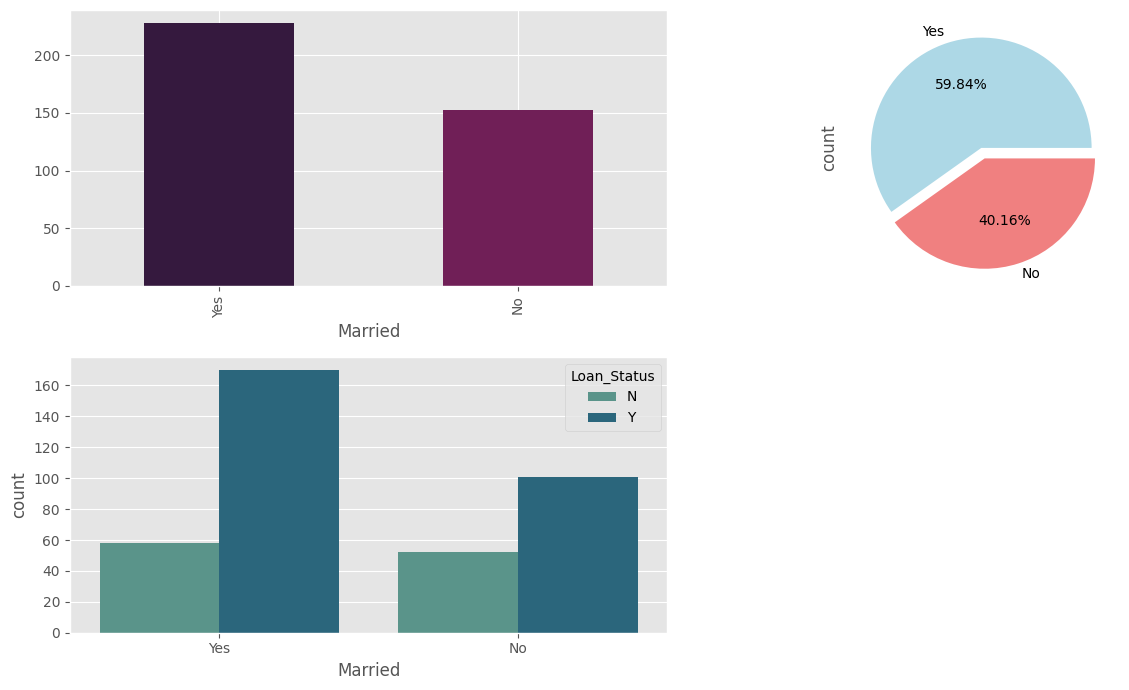

In [15]:
plt.figure(figsize=(13,7))
plt.subplot(2,2,1)
df["Married"].value_counts().plot(kind="bar",color=sns.color_palette("rocket"))
plt.subplot(2,2,2)
df["Married"].value_counts().plot(kind="pie",colors=["lightblue","lightcoral"],autopct="%0.2f%%",explode=[0,0.1])
plt.subplot(2,2,3)
sns.countplot(x = df["Married"],palette="crest",hue=df["Loan_Status"])
plt.tight_layout()
plt.show()

In [16]:
df.groupby(["Married","Loan_Status"])["Loan_Status"].count() * 100.0/df.groupby("Married")["Loan_Status"].count()

Married  Loan_Status
No       N              33.986928
         Y              66.013072
Yes      N              25.438596
         Y              74.561404
Name: Loan_Status, dtype: float64

* Those applicants are married have better channce to get loan approved compared to those who are not married.

* Dependents 

In [17]:
print(df.groupby("Dependents").size(),df.groupby("Dependents").size() * 100.0/len(df))

Dependents
0     234
1      52
2      59
3+     28
dtype: int64 Dependents
0     61.417323
1     13.648294
2     15.485564
3+     7.349081
dtype: float64


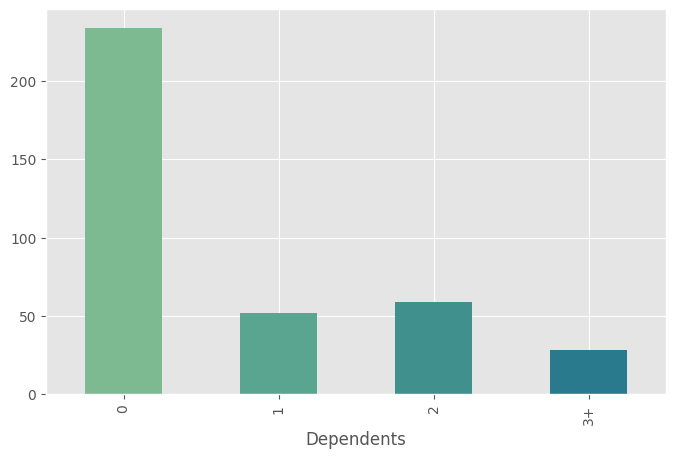

In [18]:
df.groupby("Dependents").size().plot(kind="bar",color=sns.color_palette("crest"),figsize=(8,5))
plt.show()

* So most of the appiicants have 0 dependents 

In [19]:
df.groupby(["Dependents","Loan_Status"])["Loan_Status"].count()

Dependents  Loan_Status
0           N               66
            Y              168
1           N               17
            Y               35
2           N               15
            Y               44
3+          N                8
            Y               20
Name: Loan_Status, dtype: int64

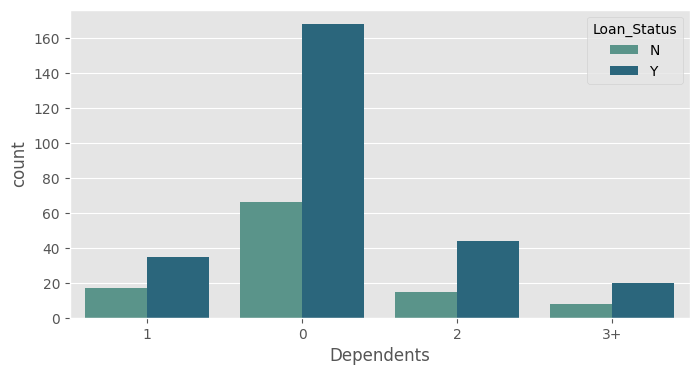

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(x = df["Dependents"],palette="crest",hue=df["Loan_Status"])
plt.show()

In [21]:
df.groupby(["Dependents","Loan_Status"])["Loan_Status"].count() * 100.0 /df.groupby("Dependents").size()

Dependents  Loan_Status
0           N              28.205128
            Y              71.794872
1           N              32.692308
            Y              67.307692
2           N              25.423729
            Y              74.576271
3+          N              28.571429
            Y              71.428571
dtype: float64

* There is not much difference between lower dependents to higher dependents to get loan approved.

In [22]:
df.groupby(["Married","Dependents","Loan_Status"])["Loan_Status"].count()

Married  Dependents  Loan_Status
No       0           N              42
                     Y              85
         1           N               5
                     Y              10
         2           N               3
                     Y               3
         3+          Y               1
Yes      0           N              24
                     Y              83
         1           N              12
                     Y              25
         2           N              12
                     Y              41
         3+          N               8
                     Y              19
Name: Loan_Status, dtype: int64

In [23]:
df.groupby(["Married","Dependents","Loan_Status"])["Loan_Status"].count() *  100.0 /df.groupby(["Married","Dependents"]).size()

Married  Dependents  Loan_Status
No       0           N               33.070866
                     Y               66.929134
         1           N               33.333333
                     Y               66.666667
         2           N               50.000000
                     Y               50.000000
         3+          Y              100.000000
Yes      0           N               22.429907
                     Y               77.570093
         1           N               32.432432
                     Y               67.567568
         2           N               22.641509
                     Y               77.358491
         3+          N               29.629630
                     Y               70.370370
dtype: float64

* Here also not much difference but married applicants have an edge over singles

* Education 

In [24]:
df["Education"].nunique()

2

In [25]:
df["Education"].value_counts()

Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64

In [26]:
df.groupby(["Education","Loan_Status"])["Loan_Status"].count()

Education     Loan_Status
Graduate      N               76
              Y              202
Not Graduate  N               34
              Y               69
Name: Loan_Status, dtype: int64

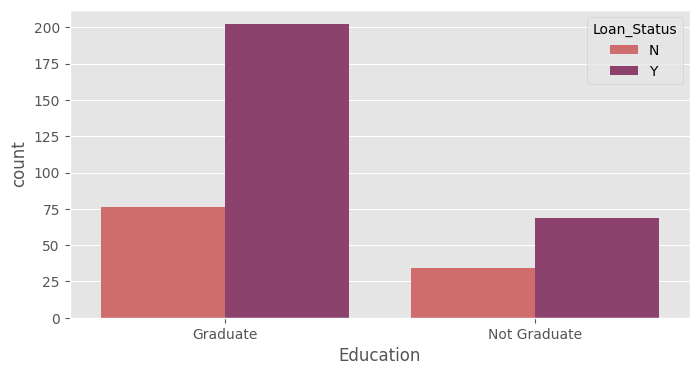

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(x = df["Education"],palette="flare",hue=df["Loan_Status"])
plt.show()

In [28]:
df.groupby(["Education","Loan_Status"])["Loan_Status"].count() * 100.0/df.groupby("Education").size()

Education     Loan_Status
Graduate      N              27.338129
              Y              72.661871
Not Graduate  N              33.009709
              Y              66.990291
dtype: float64

* So those applicants are graduated are more likely to get loan approved.

* Applicant Income 

In [29]:
df.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    3602.472727
Y    3570.660517
Name: ApplicantIncome, dtype: float64

In [30]:
df.groupby("Loan_Status")["ApplicantIncome"].quantile([0.5,0.75,0.9])

Loan_Status      
N            0.50    3418.0
             0.75    4524.5
             0.90    5266.7
Y            0.50    3276.0
             0.75    4177.0
             0.90    5503.0
Name: ApplicantIncome, dtype: float64

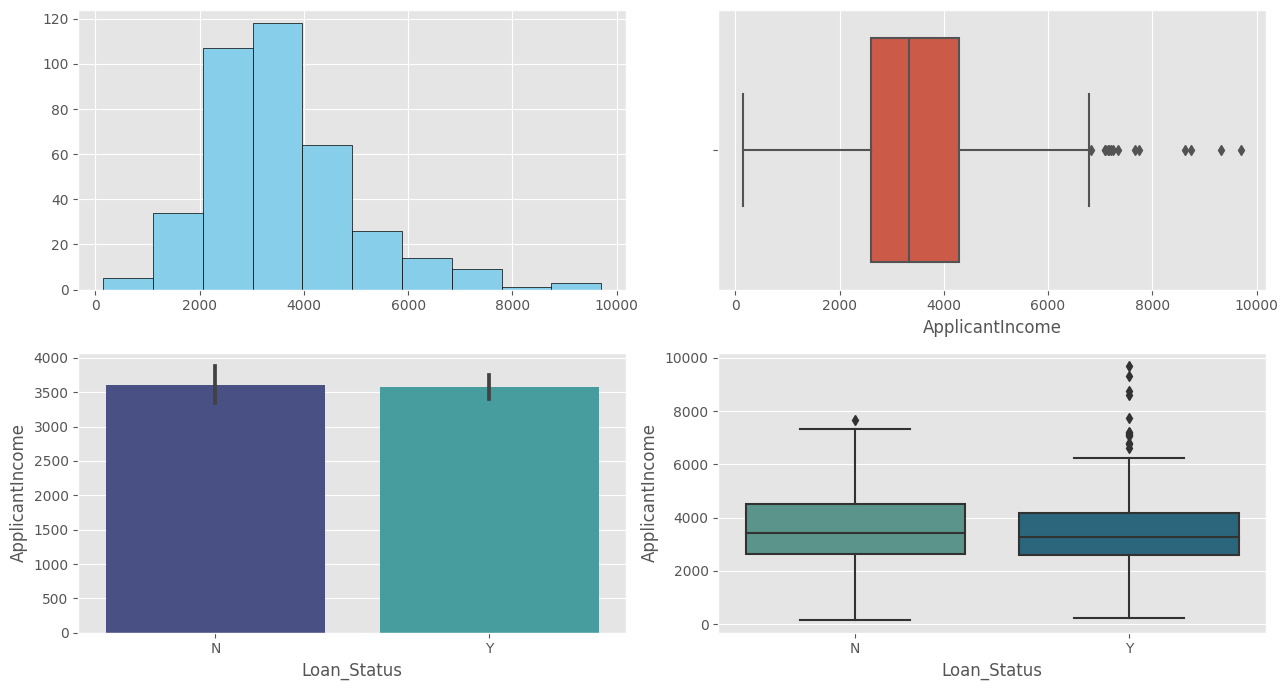

In [31]:
plt.figure(figsize=(13,7))
plt.subplot(2,2,1)
plt.hist(df["ApplicantIncome"],edgecolor="black",color="skyblue")
plt.subplot(2,2,2)
sns.boxplot(x = df["ApplicantIncome"])
plt.subplot(2,2,3)
sns.barplot(x=df["Loan_Status"],y=df["ApplicantIncome"],palette="mako")
plt.subplot(2,2,4)
sns.boxplot(x=df["Loan_Status"],y=df["ApplicantIncome"],palette="crest")
plt.tight_layout()
plt.show()

* Here we have slight difference between the income level of applicants based on loan status 

* Co Applicant Income 

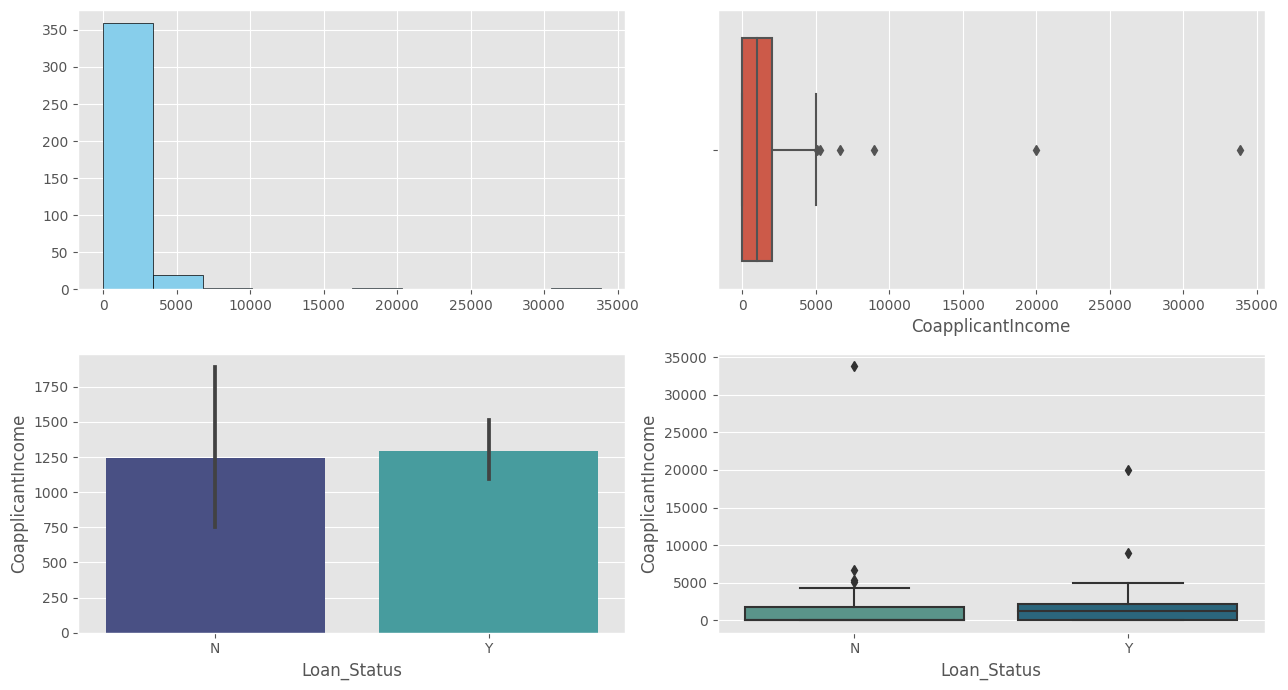

In [32]:
plt.figure(figsize=(13,7))
plt.subplot(2,2,1)
plt.hist(df["CoapplicantIncome"],edgecolor="black",color="skyblue")
plt.subplot(2,2,2)
sns.boxplot(x = df["CoapplicantIncome"])
plt.subplot(2,2,3)
sns.barplot(x=df["Loan_Status"],y=df["CoapplicantIncome"],palette="mako")
plt.subplot(2,2,4)
sns.boxplot(x=df["Loan_Status"],y=df["CoapplicantIncome"],palette="crest")
plt.tight_layout()
plt.show()

* Loan Amount 

In [33]:
df["LoanAmount"] = df["LoanAmount"] * 1000

In [34]:
df.groupby("Loan_Status")["LoanAmount"].mean()

Loan_Status
N    103154.545455
Y    105730.627306
Name: LoanAmount, dtype: float64

In [35]:
df.groupby("Loan_Status")["LoanAmount"].quantile([0.5,0.75,0.9])

Loan_Status      
N            0.50    106000.0
             0.75    124750.0
             0.90    135100.0
Y            0.50    111000.0
             0.75    128000.0
             0.90    137000.0
Name: LoanAmount, dtype: float64

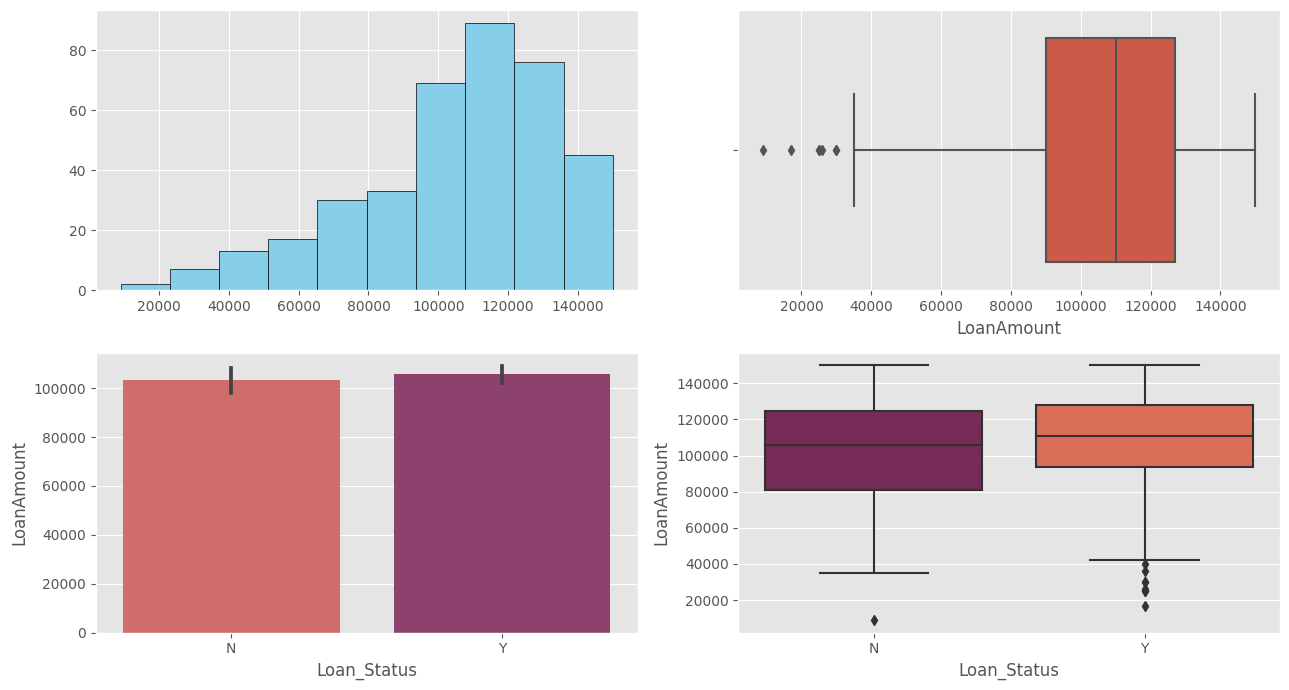

In [36]:
plt.figure(figsize=(13,7))
plt.subplot(2,2,1)
plt.hist(df["LoanAmount"],edgecolor="black",color="skyblue")
plt.subplot(2,2,2)
sns.boxplot(x = df["LoanAmount"])
plt.subplot(2,2,3)
sns.barplot(x=df["Loan_Status"],y=df["LoanAmount"],palette="flare")
plt.subplot(2,2,4)
sns.boxplot(x=df["Loan_Status"],y=df["LoanAmount"],palette="rocket")
plt.tight_layout()
plt.show()

* Somewhat we need higher loan amount to get loan approved.

* Loan Amount Term 

In [37]:
df["Loan_Amount_Term"].nunique()

10

* format of loan amount term is in months we can convert to years for more understanding 

In [38]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"]/12

In [39]:
df["Loan_Amount_Term"].value_counts() * 100.0/len(df)

Loan_Amount_Term
30.0    81.889764
15.0     7.611549
40.0     2.887139
25.0     1.837270
10.0     0.787402
7.0      0.787402
20.0     0.524934
5.0      0.262467
1.0      0.262467
3.0      0.262467
Name: count, dtype: float64

* So 90% of the loans are from only 3 category years (30,15,40)

In [40]:
grouped_counts = df[df["Loan_Amount_Term"].isin([30,15,40])].groupby(["Loan_Status","Loan_Amount_Term"])["Loan_Amount_Term"].count()
grouped_counts

Loan_Status  Loan_Amount_Term
N            15.0                 10
             30.0                 84
             40.0                  7
Y            15.0                 19
             30.0                228
             40.0                  4
Name: Loan_Amount_Term, dtype: int64

In [41]:
counts = df[df["Loan_Amount_Term"].isin([30,15,40])].groupby("Loan_Status")["Loan_Amount_Term"].count()
counts

Loan_Status
N    101
Y    251
Name: Loan_Amount_Term, dtype: int64

In [42]:
grouped_counts * 100.0/counts

Loan_Status  Loan_Amount_Term
N            15.0                 9.900990
             30.0                83.168317
             40.0                 6.930693
Y            15.0                 7.569721
             30.0                90.836653
             40.0                 1.593625
Name: Loan_Amount_Term, dtype: float64

* Self Employed 

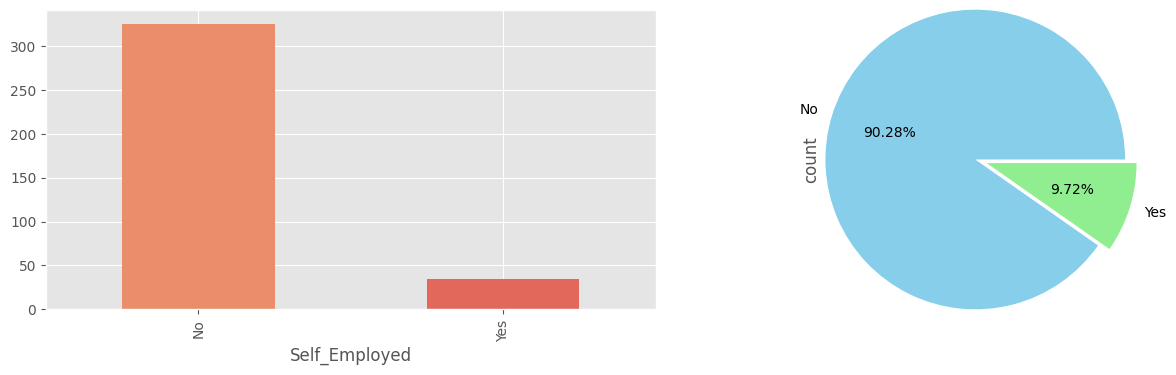

In [43]:
plt.figure(figsize=(13,7))
plt.subplot(2,2,1)
df["Self_Employed"].value_counts().plot(kind="bar",color=sns.color_palette("flare"))
plt.subplot(2,2,2)
df["Self_Employed"].value_counts().plot(kind="pie",radius=1.25,autopct="%0.2f%%",colors=["skyblue","lightgreen"],explode=[0,0.1])
plt.tight_layout()
plt.show()

In [44]:
df.groupby(["Self_Employed","Loan_Status"])["Loan_Status"].count() * 100.0/df.groupby(["Self_Employed"]).size()

Self_Employed  Loan_Status
No             N              29.230769
               Y              70.769231
Yes            N              31.428571
               Y              68.571429
dtype: float64

* Property Area 

In [45]:
df.groupby(["Property_Area","Loan_Status"])["Loan_Status"].count() * 100.0/df.groupby(["Property_Area"]).size()

Property_Area  Loan_Status
Rural          N              38.679245
               Y              61.320755
Semiurban      N              20.134228
               Y              79.865772
Urban          N              30.952381
               Y              69.047619
dtype: float64

* Credit History 

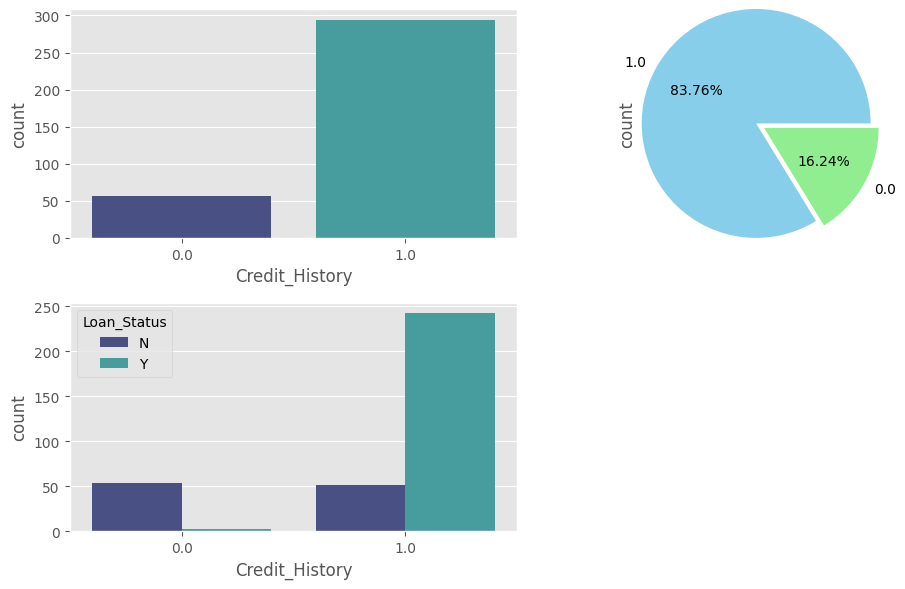

In [46]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.countplot(x=df["Credit_History"],palette="mako")
plt.subplot(2,2,2)
df["Credit_History"].value_counts().plot(kind="pie",radius=1.25,autopct="%0.2f%%",colors=["skyblue","lightgreen"],explode=[0,0.1])
plt.subplot(2,2,3)
sns.countplot(x=df["Credit_History"],hue=df["Loan_Status"],palette="mako")
plt.tight_layout()
plt.show()

In [47]:
df.groupby(["Credit_History","Loan_Status"])["Loan_Status"].count() * 100.0/df.groupby(["Credit_History"]).size()

Credit_History  Loan_Status
0.0             N              94.736842
                Y               5.263158
1.0             N              17.687075
                Y              82.312925
dtype: float64

* Those applicants have positive credit history, get loan approved easily.

### Missing Values Treatment 

In [48]:
df.isnull().sum()>0

Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [49]:
n_col = ["Gender","Dependents","Self_Employed","Loan_Amount_Term","Credit_History"]

In [50]:
for col in n_col:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value,inplace=True)

In [51]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

### Feature Transformation

In [52]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [53]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64

In [54]:
df["Gender"] = df["Gender"].apply(lambda x:1 if x=="Male" else 0 )
df["Education"] = df["Education"].apply(lambda x:1 if x=="Graduate" else 0 )
df["Married"] = df["Married"].apply(lambda x:1 if x=="Yes" else 0 )
df["Loan_Status"] = df["Loan_Status"].apply(lambda x:1 if x=="Y" else 0 )
df["Self_Employed"] = df["Self_Employed"].apply(lambda x:1 if x=="Yes" else 0 )
df["Property_Area"] = df["Property_Area"].map({"Rural":0,"Semiurban":1,"Urban":2})

In [55]:
df["Dependents"] = df["Dependents"].str[0].astype("int")

In [56]:
df.dtypes 

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

### Feature Importance 

In [57]:
X = df.drop("Loan_Status",axis=1)
y = df["Loan_Status"]

In [58]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

In [59]:
rf_feature_imp = RandomForestClassifier()
rf_feature_imp.fit(X,y)

RandomForestClassifier()

In [60]:
feature_imp_list = list(rf_feature_imp.feature_importances_)

In [61]:
feature_imp_df = pd.DataFrame({"features":X.columns[:],"feature_importance":feature_imp_list})

In [62]:
feature_imp_df.sort_values(by="feature_importance",ascending=False)

,features,feature_importance
9,Credit_History,0.327715
5,ApplicantIncome,0.184171
7,LoanAmount,0.164765
6,CoapplicantIncome,0.101857
8,Loan_Amount_Term,0.047642
10,Property_Area,0.045920
2,Dependents,0.041120
3,Education,0.025974
1,Married,0.023236
0,Gender,0.021541


* Credit history is very important feature for our prediction 

### Train Test Split 

In [63]:
from sklearn.model_selection import train_test_split 

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

### Feature Scalling 

In [65]:
from sklearn.preprocessing import MinMaxScaler 

In [66]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [67]:
y_train.value_counts()

Loan_Status
1    204
0     81
Name: count, dtype: int64

In [68]:
y_test.value_counts()

Loan_Status
1    67
0    29
Name: count, dtype: int64

### Model Building 

#### Logistic Regression 

In [69]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [70]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_log_test_pred = log_model.predict(X_test)

In [71]:
cf_log = confusion_matrix(y_test,y_log_test_pred)

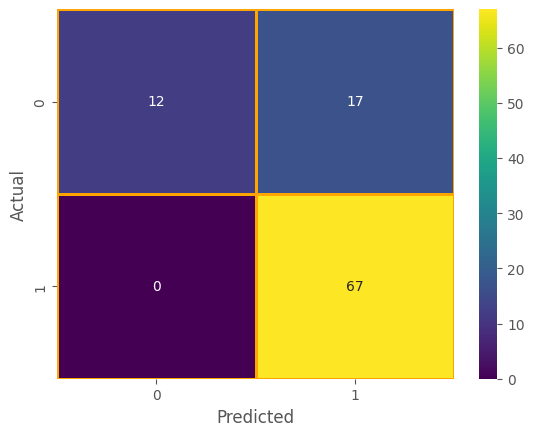

In [72]:
sns.heatmap(cf_log,annot=True,cmap="viridis",linecolor="orange",linewidth=1,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [73]:
report_dict_log = classification_report(y_test,y_log_test_pred,output_dict=True)
report_df_log = pd.DataFrame(report_dict_log)
report_df_log

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.797619,0.822917,0.898810,0.858755
recall,0.413793,1.000000,0.822917,0.706897,0.822917
f1-score,0.585366,0.887417,0.822917,0.736392,0.796173
support,29.000000,67.000000,0.822917,96.000000,96.000000


* As we can see recall for 0th class came very low due to imbalanced class 

### SMOTE method 

* To balance the target variable 

In [74]:
y.value_counts()

Loan_Status
1    271
0    110
Name: count, dtype: int64

In [75]:
a = df[df["Loan_Status"]==0]["LoanAmount"]
b = df[df["Loan_Status"]==1]["LoanAmount"]
A = list(range(1,len(a)+1))
B = list(range(1,len(b)+1))

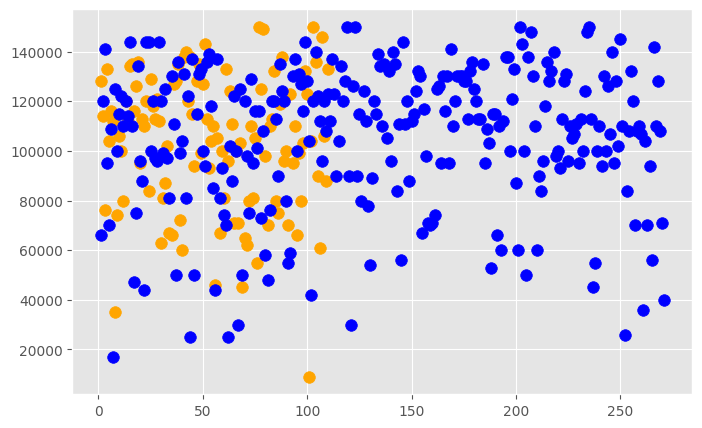

In [76]:
plt.figure(figsize=(8,5))
plt.scatter(x = A,y=list(a),marker="o",s=70,color="orange")
plt.scatter(x = B,y=list(b),marker="o",s=70,color="Blue")
plt.show()

In [77]:
from imblearn.over_sampling import SMOTE 
from collections import Counter 

In [78]:
over = SMOTE(sampling_strategy="minority")
X,y = over.fit_resample(X,y)

In [79]:
balanced_dict = Counter(y)
balanced_dict

Counter({0: 271, 1: 271})

In [80]:
inp0 = pd.concat([X,y],axis=1)

In [81]:
inp0.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508.0,128000.0,30.0,1.0,0,0
1,1,1,0,1,1,3000,0.0,66000.0,30.0,1.0,2,1
2,1,1,0,0,0,2583,2358.0,120000.0,30.0,1.0,2,1
3,1,0,0,1,0,6000,0.0,141000.0,30.0,1.0,2,1
4,1,1,0,0,0,2333,1516.0,95000.0,30.0,1.0,2,1


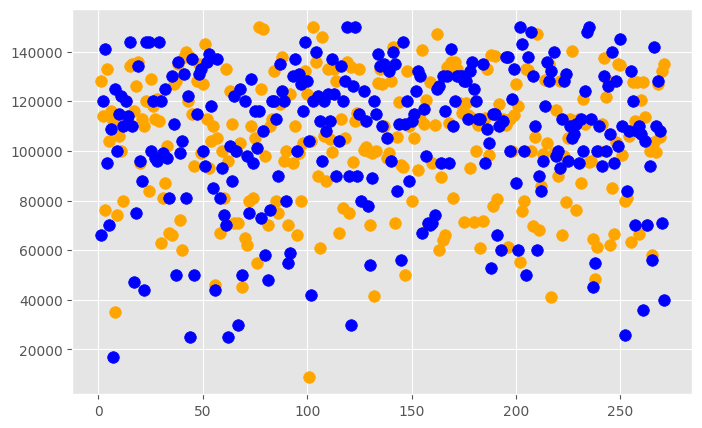

In [82]:
a = inp0[inp0["Loan_Status"]==0]["LoanAmount"]
b = inp0[inp0["Loan_Status"]==1]["LoanAmount"]
A = list(range(1,len(a)+1))
B = list(range(1,len(b)+1))
plt.figure(figsize=(8,5))
plt.scatter(x = A,y=list(a),marker="o",s=70,color="orange")
plt.scatter(x = B,y=list(b),marker="o",s=70,color="Blue")
plt.show()

In [83]:
X = inp0.drop("Loan_Status",axis=1)
y = inp0["Loan_Status"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42,stratify=y)
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [84]:
y_test.value_counts()

Loan_Status
0    68
1    68
Name: count, dtype: int64

In [85]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_log_test_pred = log_model.predict(X_test)

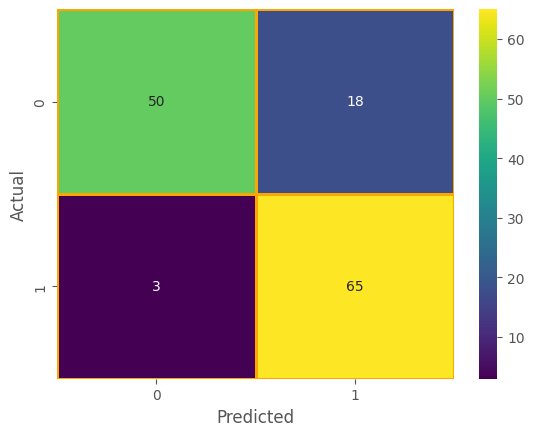

In [86]:
cf_log = confusion_matrix(y_test,y_log_test_pred)
sns.heatmap(cf_log,annot=True,cmap="viridis",linecolor="orange",linewidth=1,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [87]:
report_dict_log = classification_report(y_test,y_log_test_pred,output_dict=True)
report_df_log = pd.DataFrame(report_dict_log)
report_df_log

,0,1,accuracy,macro avg,weighted avg
precision,0.943396,0.783133,0.845588,0.863264,0.863264
recall,0.735294,0.955882,0.845588,0.845588,0.845588
f1-score,0.826446,0.860927,0.845588,0.843687,0.843687
support,68.000000,68.000000,0.845588,136.000000,136.000000


* Now F1 score for both the classes came good 

#### Random Forest Classifier 

In [88]:
score = {}
for i in range(5,101,5):
    rf_model = RandomForestClassifier(n_estimators = i)
    rf_model.fit(X_train,y_train)
    y_rf_test_pred = rf_model.predict(X_test)
    a = f1_score(y_test,y_rf_test_pred)
    score[f"{i} models"] = a 

In [89]:
score = dict(sorted(score.items(),key = lambda x:x[1],reverse=True))
score 

{'15 models': 0.8918918918918919,
 '80 models': 0.8904109589041096,
 '35 models': 0.8843537414965986,
 '45 models': 0.8843537414965986,
 '40 models': 0.8783783783783784,
 '55 models': 0.8783783783783784,
 '70 models': 0.8783783783783784,
 '75 models': 0.8783783783783784,
 '90 models': 0.8783783783783784,
 '30 models': 0.8767123287671232,
 '50 models': 0.8767123287671232,
 '100 models': 0.8767123287671232,
 '20 models': 0.87248322147651,
 '95 models': 0.87248322147651,
 '25 models': 0.8707482993197279,
 '60 models': 0.8707482993197279,
 '85 models': 0.8707482993197279,
 '65 models': 0.8689655172413794,
 '10 models': 0.8531468531468531,
 '5 models': 0.8285714285714286}

In [90]:
n_models = int(list(score.keys())[0].split()[0])

In [91]:
rf_model = RandomForestClassifier(n_estimators = n_models)
rf_model.fit(X_train,y_train)
y_rf_test_pred = rf_model.predict(X_test)

In [92]:
cf_rf = confusion_matrix(y_test,y_rf_test_pred)

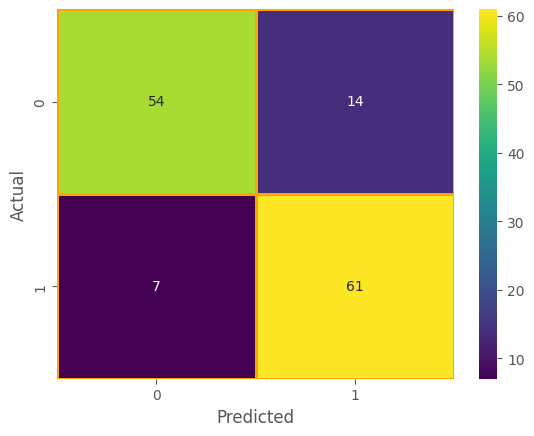

In [93]:
sns.heatmap(cf_rf,annot=True,cmap="viridis",linewidth=1,linecolor="orange",fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [94]:
report_dict_rf = classification_report(y_test,y_rf_test_pred,output_dict=True)
report_df_rf = pd.DataFrame(report_dict_rf)
report_df_rf

,0,1,accuracy,macro avg,weighted avg
precision,0.885246,0.813333,0.845588,0.849290,0.849290
recall,0.794118,0.897059,0.845588,0.845588,0.845588
f1-score,0.837209,0.853147,0.845588,0.845178,0.845178
support,68.000000,68.000000,0.845588,136.000000,136.000000


* Both accuracy and f1 score came higher in random forest compared to logistic regression 